<a href="https://colab.research.google.com/github/SyedHuzaifa007/DogsVsCats-Image-Classification-DL-Model/blob/main/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Importing Modules
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Defining Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
# Making A Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
model.compile(loss='binary_crossentropy',
optimizer = RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [16]:
train_dir = "/content/drive/MyDrive/Datasets/cats_and_dogs_small/train"
validation_dir = "/content/drive/MyDrive/Datasets/cats_and_dogs_small/validation"
test_dir = "/content/drive/MyDrive/Datasets/cats_and_dogs_small/test"

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 1774s 18s/step - loss: 0.6932 - acc: 0.5310 - val_loss: 0.6769 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 15s 152ms/step - loss: 0.6661 - acc: 0.5865 - val_loss: 0.6449 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 15s 151ms/step - loss: 0.6266 - acc: 0.6530 - val_loss: 0.6210 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 15s 151ms/step - loss: 0.5879 - acc: 0.6850 - val_loss: 0.6230 - val_acc: 0.6260
Epoch 5/30
100/100 [==============================] - 15s 151ms/step - loss: 0.5475 - acc: 0.7245 - val_loss: 0.6220 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 15s 151ms/step - loss: 0.5235 - acc: 0.7295 - val_loss: 0.5765 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 15s 151ms/step - loss: 0.4958 - acc: 0.7540 - val_loss: 0.5602 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 1

In [21]:
model.save('cats_and_dogs_small_1.h5')

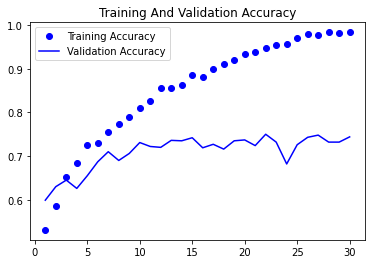

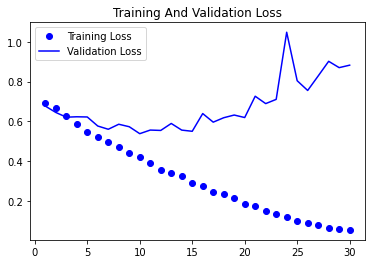

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
plt.show()

In [24]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [25]:
train_cats_dir = "/content/drive/MyDrive/Datasets/cats_and_dogs_small/train/cats"

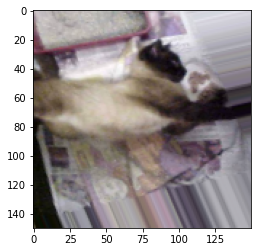

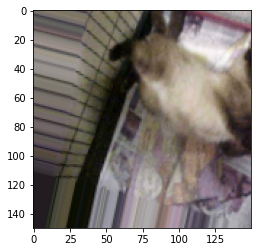

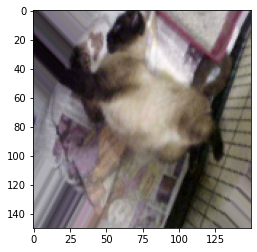

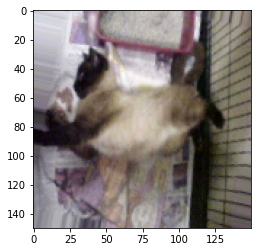

In [26]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [27]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model2.compile(loss='binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics=['acc'])

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
history2 = model2.fit_generator(train_generator, steps_per_epoch=50, epochs=50, validation_data=validation_generator, validation_steps=20)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 21s 384ms/step - loss: 0.6931 - acc: 0.5271 - val_loss: 0.7193 - val_acc: 0.5016
Epoch 2/50
50/50 [==============================] - 19s 383ms/step - loss: 0.6935 - acc: 0.5246 - val_loss: 0.6926 - val_acc: 0.4812
Epoch 3/50
50/50 [==============================] - 19s 380ms/step - loss: 0.6817 - acc: 0.5612 - val_loss: 0.6815 - val_acc: 0.5359
Epoch 4/50
50/50 [==============================] - 19s 382ms/step - loss: 0.6788 - acc: 0.5720 - val_loss: 0.7083 - val_acc: 0.5125
Epoch 5/50
50/50 [==============================] - 20s 391ms/step - loss: 0.6641 - acc: 0.5865 - val_loss: 0.6518 - val_acc: 0.5984
Epoch 6/50
50/50 [==============================] - 20s 394ms/step - loss: 0.6707 - acc: 0.5856 - val_loss: 0.6560 - val_acc: 0.6109
Epoch 7/50
50/50 [==============================] - 19s 385ms/step - loss: 0.6633 - acc: 0.5953 - val_loss: 0.6393 - val_acc: 0.6156
Epoch 8/50
50/50 [==============================] - 19s 390ms/step - 

In [36]:
model.save('cats_and_dogs_small_2.h5')

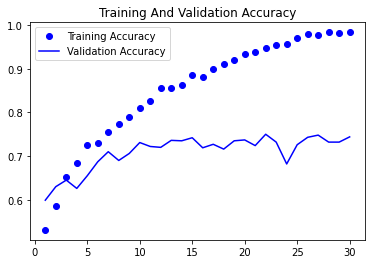

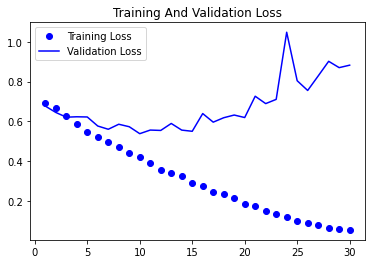

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
plt.show()

In [41]:
# Instantiating The VGG16 Convolutional Base
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 2s 0us/step


In [43]:
# Printing VGG16 Architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
# Extracting Features Using The Pretrained Convolutional Base
base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
features = np.zeros(shape=(sample_count, 4, 4, 512))
labels = np.zeros(shape=(sample_count))
generator = datagen.flow_from_directory(
directory,
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')
i = 0
for inputs_batch, labels_batch in generator:
features_batch = conv_base.predict(inputs_batch)
features[i * batch_size : (i + 1) * batch_size] = features_batch
labels[i * batch_size : (i + 1) * batch_size] = labels_batch
i += 1
if i * batch_size >= sample_count:
break
return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)